In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../cix')
import myfuncs as mf
import pandas as pd
from rdkit import rdBase
rdBase.DisableLog('rdApp.*') # To make rdkit silent
from rdkit.Chem import PandasTools as pt
from rdkit.Chem import Descriptors
import numpy as np
import time
import os
from rdkit.Chem import RDConfig
from rdkit import Chem
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs

In [4]:
# Import drug data, keep only 310K random molecules
smidf = pd.read_csv("../data/z.smi", header = None, sep = ' ', names = ['smiles','zid'])
smidf.head()

,smiles,zid
0,COc1cc(Cl)cc2c1OC(C)C(=O)N(c1c(F)cccc1F)C2,s1
1,COc1ccc(N2CC(C(=O)Oc3cc(C)ccc3C)CC2=O)cc1,s2
2,CC1CCC(C(N)=O)CN1C(=O)Nc1cnn(C(C)(C)C)c1,s3
3,CN(Cc1nc2ccccc2c(=O)[nH]1)C(=O)c1cn2ccccc2n1,s4
4,CC(C)c1noc(C(C)N2CCN(CC(=O)N(C)C)CC2)n1,s5


In [5]:
# Find the first centroid
cls = mf.clusmidf(smidf)

Clustering time: 00:15:27


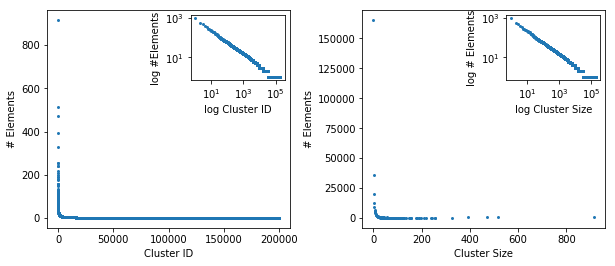

In [11]:
# Plot the clusters distributions and cluster size distribution
mf.plotmulticlus([cls], 10, 4)

In [36]:
# We're going to plot the structures of the first cluster. First retrieve the SMILES
cl_smis = []
for i in range(10):
    cl = cls[i]
    smis = [smidf.loc[smidf["zid"] == i, "smiles"].iloc[0] for i in cl]
    cl_smis.append(smis)

/home/gcolmenarejo/anaconda3/envs/cix/lib/python2.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:172: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn("Truncating the list of molecules to be displayed to %d. Change the maxMols value to display more."%(maxMols))


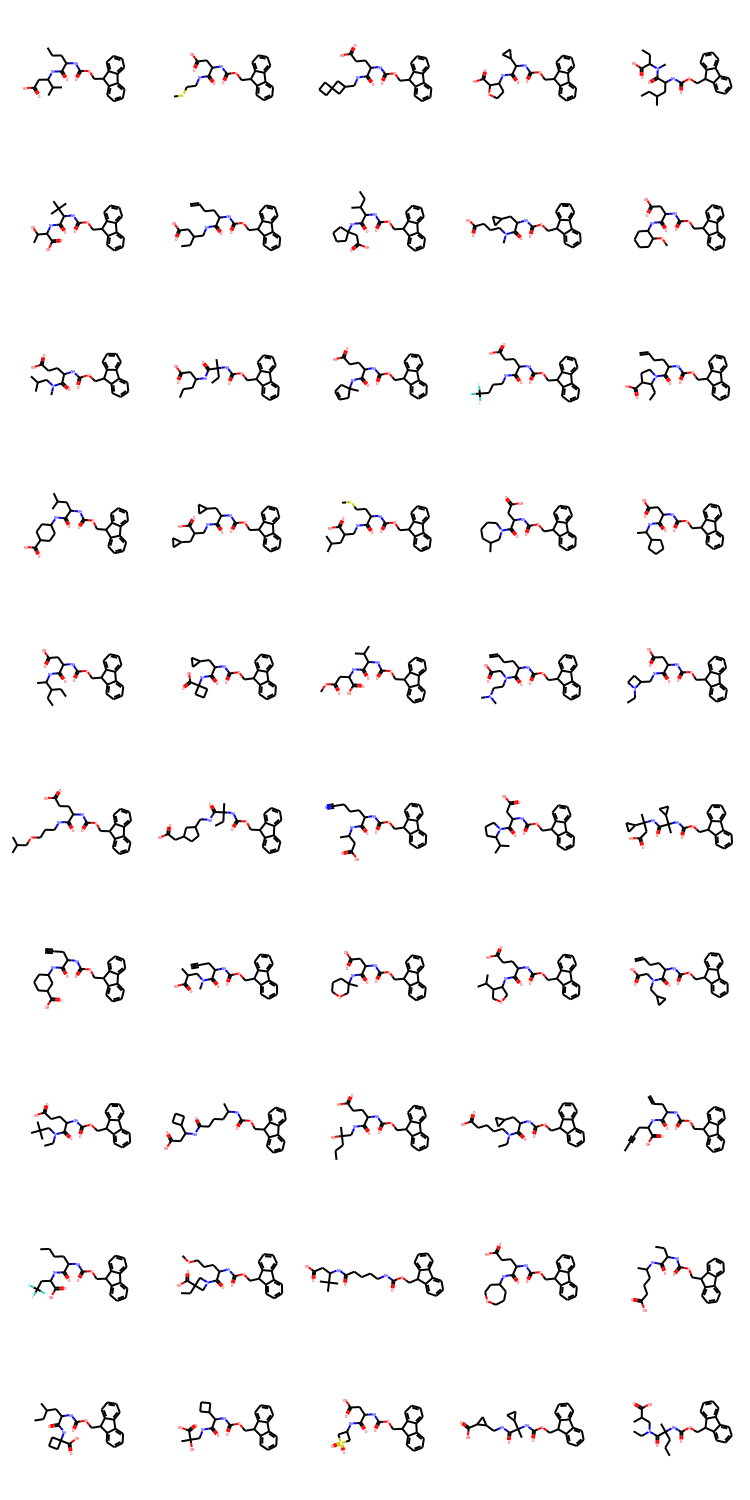

In [37]:
# Now paint the molecules
mf.paintmols(cl_smis[0])

In [38]:
#We're interested in finding the property distributions of the first cluster. First the MWt

mws0 = [Chem.Descriptors.MolWt(Chem.MolFromSmiles(s)) for s in cl_smis[0]]

(array([  3.,   0.,   3.,   7.,   2.,  28.,   7.,  12.,  85.,   6.,  87.,
        106.,  19., 219.,  52.,  61., 171.,  15.,  21.,  11.]),
 array([394.427 , 399.6379, 404.8488, 410.0597, 415.2706, 420.4815,
        425.6924, 430.9033, 436.1142, 441.3251, 446.536 , 451.7469,
        456.9578, 462.1687, 467.3796, 472.5905, 477.8014, 483.0123,
        488.2232, 493.4341, 498.645 ]),
 <a list of 20 Patch objects>)

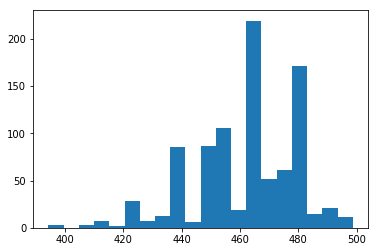

In [39]:
plt.hist(mws0, bins = 20)

In [40]:
# Then the logP

logps0 = [Chem.Descriptors.MolLogP(Chem.MolFromSmiles(s)) for s in cl_smis[0]]

(array([  1.,   1.,   2.,   6.,   4.,  13.,  13.,  17.,  45.,  38.,  62.,
         54.,  70.,  97.,  52., 115.,  96.,  77.,  93.,  59.]),
 array([0.7731 , 0.98253, 1.19196, 1.40139, 1.61082, 1.82025, 2.02968,
        2.23911, 2.44854, 2.65797, 2.8674 , 3.07683, 3.28626, 3.49569,
        3.70512, 3.91455, 4.12398, 4.33341, 4.54284, 4.75227, 4.9617 ]),
 <a list of 20 Patch objects>)

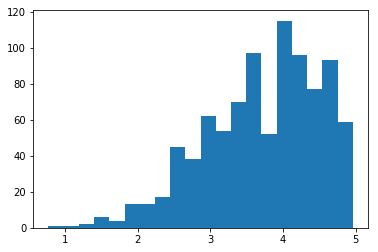

In [41]:
plt.hist(logps0, bins = 20)

In [42]:
# This is the minimum lopP of the first cluster
min(logps0)

0.7731000000000019

In [11]:
# We add MWt and logP to the whole dataframe

smidf['mol'] = smidf['smiles'].apply(Chem.MolFromSmiles)
smidf['mwt'] = smidf['mol'].apply(Descriptors.MolWt)
smidf['logp'] = smidf['mol'].apply(Descriptors.MolLogP)

In [6]:
# Now we proceed to add a column to smidf that is the Tanimoto similarity to the first centroid. This is it.

cls[0][0]

's99829'

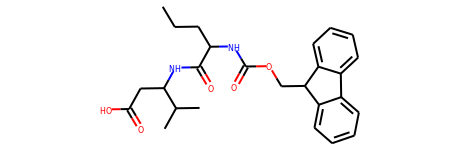

In [12]:
query = Chem.MolFromSmiles(smidf.loc[smidf.zid == 's99829', 'smiles'].iloc[0])
query

In [52]:
smidf.loc[smidf.zid == 's99829', 'smiles'].iloc[0]

'CCCC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)NC(CC(=O)O)C(C)C'

In [14]:
smidf['fp'] = smidf['mol'].apply(FingerprintMols.FingerprintMol)

In [28]:
q_fp = FingerprintMols.FingerprintMol(query)
smidf['similarity'] = smidf.fp.apply(lambda x: DataStructs.FingerprintSimilarity(x,q_fp))

In [43]:
smidf[["smiles","logp","similarity","mwt"]].to_csv("./exp6set.csv", index = False)

In [44]:
cls[0]

['s99829',
 's211136',
 's261914',
 's144531',
 's207506',
 's211271',
 's279824',
 's32878',
 's190609',
 's218598',
 's260978',
 's73369',
 's83555',
 's239005',
 's82940',
 's23282',
 's183989',
 's53230',
 's57194',
 's57811',
 's163899',
 's235186',
 's145345',
 's38890',
 's214847',
 's302504',
 's63085',
 's6688',
 's175109',
 's104420',
 's202254',
 's63280',
 's164158',
 's273408',
 's92398',
 's110338',
 's40687',
 's118870',
 's118991',
 's169762',
 's93502',
 's52251',
 's226112',
 's130266',
 's135560',
 's296448',
 's307601',
 's134071',
 's247259',
 's128606',
 's241934',
 's176872',
 's222078',
 's164738',
 's209841',
 's149135',
 's150245',
 's159868',
 's157214',
 's7169',
 's156586',
 's29126',
 's78108',
 's194711',
 's226243',
 's84907',
 's48425',
 's35605',
 's89852',
 's41342',
 's187999',
 's180373',
 's197097',
 's219622',
 's254900',
 's256643',
 's49998',
 's14720',
 's103894',
 's157660',
 's287370',
 's73936',
 's168995',
 's11573',
 's153621',
 's173506',

In [51]:
smidf.loc[smidf.zid.isin(cls[0]), "similarity"]

42        0.847328
218       0.822581
1931      0.861053
2049      0.863886
3030      0.875978
3265      0.826133
3518      0.870756
3700      0.849119
4087      0.838126
4131      0.820122
4324      0.800839
4740      0.849372
4795      0.839532
4933      0.866741
5018      0.830169
5228      0.871254
5502      0.824211
5611      0.809874
6116      0.848775
6375      0.881828
6687      0.935409
7168      0.827368
7927      0.861259
8318      0.812291
8459      0.829925
8476      0.855006
8800      0.853712
9009      0.840256
9314      0.805195
9542      0.849036
9874      0.842278
9993      0.855769
10318     0.887260
11135     0.825630
11240     0.826638
11572     0.943052
11683     0.815514
11731     0.812829
12109     0.850159
12274     0.823045
12357     0.835294
13152     0.810982
13263     0.817125
13765     0.828723
13976     0.833333
13991     0.830250
14670     0.893777
14719     0.819706
14848     0.852285
15527     0.871901
15586     0.841477
15608     0.807531
16178     0.

In [54]:
# Show the molecules with similarity > 0.8 and logp < 1

good_mols = smidf.loc[(smidf.similarity > 0.8) & (smidf.logp < 1), ["smiles","zid","logp","mwt","similarity"]]
good_mols.shape
good_mols

,smiles,zid,logp,mwt,similarity
39291,NS(=O)(=O)CCNC(=O)C(CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,s39292,0.7731,461.496,0.824223


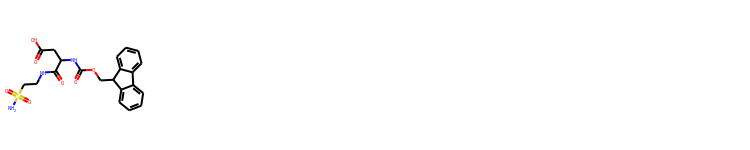

In [55]:
mf.paintmols(good_mols.smiles)